In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',50)
%matplotlib inline

In [71]:
data = pd.read_excel("C:/Users/micha/Downloads/Office_Supply_Campaign_ResultS_7-23-19.xlsx")

In [72]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [76]:
data["Language"].fillna(value="n/a",inplace = True)
data["Last Transaction Channel"].fillna(value="n/a",inplace = True)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             16173 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [78]:
len(data["Customer Number"].unique())

16173

In [79]:
data["Campaign Period Sales"].describe()

count    16172.000000
mean       245.896967
std        720.317450
min       -566.500000
25%          0.000000
50%          0.000000
75%        145.669048
max       8936.850000
Name: Campaign Period Sales, dtype: float64

In [80]:
data.loc[data["Campaign Period Sales"]<0].shape

(6, 21)

In [81]:
data = data.loc[data["Campaign Period Sales"]>=0]

In [82]:
data["Campaign Period Sales"].describe()

count    16166.000000
mean       246.076325
std        720.381442
min          0.000000
25%          0.000000
50%          0.000000
75%        145.709048
max       8936.850000
Name: Campaign Period Sales, dtype: float64

In [83]:
data = data.loc[data["Customer Number"].notnull()]

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16166 entries, 0 to 16171
Data columns (total 21 columns):
Customer Number                      16166 non-null float64
Campaign Period Sales                16166 non-null float64
Historical Sales Volume              16166 non-null float64
Date of First Purchase               16166 non-null datetime64[ns]
Number of Prior Year Transactions    16166 non-null float64
Do Not Direct Mail Solicit           16166 non-null float64
Do Not Email                         16166 non-null float64
Do Not Telemarket                    16166 non-null float64
Repurchase Method                    16166 non-null object
Last Transaction Channel             16166 non-null object
Desk                                 16166 non-null object
Executive Chair                      16165 non-null object
Standard Chair                       16165 non-null object
Monitor                              16165 non-null object
Printer                              16165 non-nul

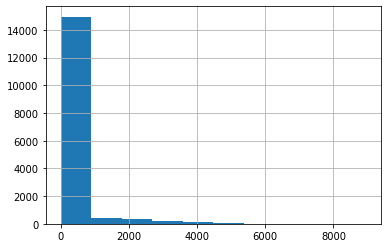

In [85]:
data["Campaign Period Sales"].hist()

In [86]:
data["Historical Sales Volume"].describe()

count    1.616600e+04
mean     6.718834e+05
std      9.567383e+05
min     -1.643031e+05
25%      1.901214e+05
50%      3.965674e+05
75%      7.878854e+05
max      3.441213e+07
Name: Historical Sales Volume, dtype: float64

In [87]:
len(data["Historical Sales Volume"])

16166

In [88]:
data.loc[data["Historical Sales Volume"]<0]

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
2216,5125266.0,0.0,-126638.40,1995-10-01,18.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English
6139,13758714.0,0.0,-20021.76,2015-07-22,16.0,1.0,0.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,Y,1-5,English
9300,20726836.0,0.0,-9184.00,2011-01-05,16.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English
12548,28176445.0,0.0,-164303.10,2012-10-31,18.0,1.0,1.0,1.0,AUTO RENEW,PHONE,N,N,N,N,N,N,N,N,N,11-50,English


In [90]:
data = data.loc[data["Historical Sales Volume"]>=0]

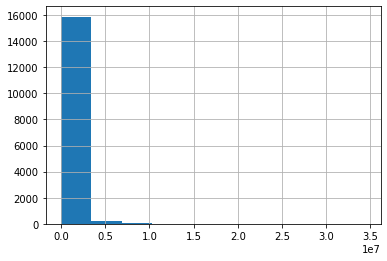

In [91]:
data["Historical Sales Volume"].hist()

In [92]:
data["Number of Prior Year Transactions"].describe()

count    16162.000000
mean        14.483913
std          8.031489
min          1.000000
25%          8.000000
50%         16.000000
75%         20.000000
max        313.000000
Name: Number of Prior Year Transactions, dtype: float64

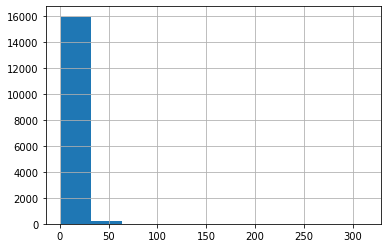

In [93]:
data["Number of Prior Year Transactions"].hist()

In [94]:
data.loc[data["Number of Prior Year Transactions"]>300]

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
3331,7585835.0,2629.666667,163039.333333,1979-02-01,313.0,1.0,0.0,1.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,n/a


In [95]:
time_now = pd.datetime.now()
time_membership = time_now - data["Date of First Purchase"] 
time_membership


0       18789 days 17:55:57.497944
1       14149 days 17:55:57.497944
2       20950 days 17:55:57.497944
3       13433 days 17:55:57.497944
4       11928 days 17:55:57.497944
                   ...            
16167    8853 days 17:55:57.497944
16168    9415 days 17:55:57.497944
16169    9201 days 17:55:57.497944
16170    8805 days 17:55:57.497944
16171    8032 days 17:55:57.497944
Name: Date of First Purchase, Length: 16162, dtype: timedelta64[ns]

In [96]:
data["Time since first purchase"] = time_now - data["Date of First Purchase"] 


In [97]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Time since first purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,18789 days 17:55:57.497944
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,14149 days 17:55:57.497944
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,20950 days 17:55:57.497944
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,13433 days 17:55:57.497944
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,n/a,11928 days 17:55:57.497944


In [98]:
data["Days of contact"] = data["Time since first purchase"].dt.days
data['Days of contact']

0        18789
1        14149
2        20950
3        13433
4        11928
         ...  
16167     8853
16168     9415
16169     9201
16170     8805
16171     8032
Name: Days of contact, Length: 16162, dtype: int64

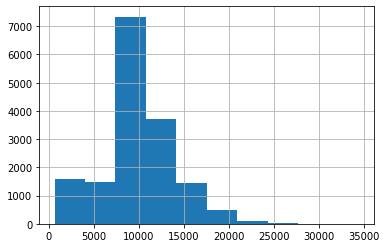

In [99]:
data["Days of contact"].hist()

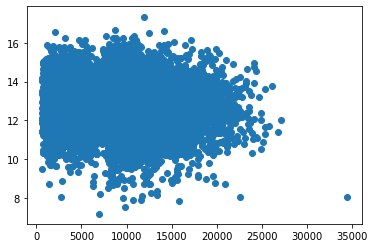

In [100]:
plt.scatter(data["Days of contact"],np.log(data["Historical Sales Volume"]))

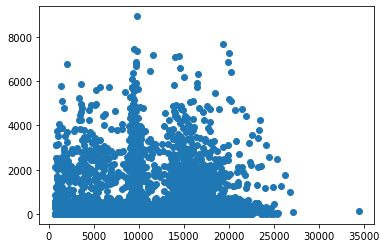

In [101]:
plt.scatter(data["Days of contact"],data["Campaign Period Sales"])

In [102]:
products = ["Desk","Executive Chair","Standard Chair","Monitor","Printer","Computer","Insurance","Toner","Office Supplies"]


In [103]:
prods = data.loc[:,products]


In [104]:
prods.head()

,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,N,N,N,N,N,N,Y,N,Y
1,N,N,N,N,N,N,N,N,Y
2,N,N,N,N,N,N,N,N,Y
3,N,N,N,N,N,N,N,N,Y
4,N,N,N,N,N,N,Y,N,N


In [140]:
def y_no_binary(x):
    if x == "Y":
        return 1
    else:
        return 0

In [141]:
for cols in products:
    data[cols] = data[cols].apply(y_no_binary)
data[cols]

0        0
1        0
2        0
3        0
4        0
        ..
16167    0
16168    0
16169    0
16170    0
16171    0
Name: Office Supplies, Length: 16162, dtype: int64

In [142]:
for cols in products:
    data_up_sampled[cols] = data_up_sampled[cols].apply(y_no_binary)

In [107]:
data.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Time since first purchase,Days of contact
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,6-10,English,18789 days 17:55:57.497944,18789
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,11-50,English,14149 days 17:55:57.497944,14149
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,6-10,English,20950 days 17:55:57.497944,20950
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,1-5,English,13433 days 17:55:57.497944,13433
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,,n/a,11928 days 17:55:57.497944,11928


In [143]:
def buy_or_not_buy(x):
    if x > 0:
        return "Y"
    else:
        return "N"

In [151]:
X = data[["Historical Sales Volume","Number of Prior Year Transactions","Do Not Direct Mail Solicit","Repurchase Method","Last Transaction Channel",
        "Days of contact" ]]
X = pd.get_dummies(X,drop_first = True)

In [152]:
data["made purchase"] = data["Campaign Period Sales"].apply(buy_or_not_buy)

In [153]:
y1 = data["made purchase"]

In [147]:
X =  data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions","made purchase"]].dropna()


In [148]:
#X_train,X_test,y_train,y_test = train_test_split(data[:,:-1],X["made purchase"])

TypeError: '(slice(None, None, None), slice(None, -1, None))' is an invalid key

In [127]:
data[products].sum()

Desk                 911
Executive Chair     1157
Standard Chair       281
Monitor              298
Printer              426
Computer             230
Insurance           1931
Toner               1058
Office Supplies    11798
dtype: int64

In [128]:
data["Office Supplies"].describe()

count    16162.000000
mean         0.729984
std          0.443982
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Office Supplies, dtype: float64

In [129]:
data["made purchase"].describe()

count     16162
unique        2
top           N
freq      11783
Name: made purchase, dtype: object

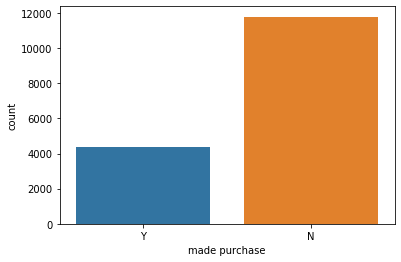

In [149]:
import seaborn as sns
sns.countplot(y1)

In [130]:
np.unique(y1)# come back decide if you want to balance suggestion upsample minority class use sklearn resample we want a predictive model
# thus want to make sure were not bias want equal representation
data["made purchase"].value_counts()

N    11783
Y     4379
Name: made purchase, dtype: int64

In [51]:
from sklearn.utils import resample

In [53]:
minority_class = data.loc[data["made purchase"] == "Y"]
majority_class = data.loc[data["made purchase"]== "N"]

In [57]:
resampled_minority_class = resample(minority_class,replace = True,n_samples = 11783,random_state = 25)
data_up_sampled = pd.concat([majority_class,resampled_minority_class])

In [59]:
data_up_sampled["made purchase"].value_counts()

Y    11783
N    11783
Name: made purchase, dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [154]:
clf = LogisticRegression()
dtree = DecisionTreeClassifier()

In [155]:
#X_train,X_test,y_train,y_test = train_test_split(X,y1)

In [156]:
#X_train,X_test,y_train,y_test = train_test_split(X.iloc[:,:-1],X["made purchase"])
#dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
 #clf.fit(X_train,y_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
#clf.score(X_test,y_test)

0.7223459539717891

In [159]:
#dtree.score(X_test,y_test)# does better then a performance classifier suggest using random forest.

0.7866864637465973

In [160]:
#y_test.value_counts(normalize=True)

N    0.722346
Y    0.277654
Name: made purchase, dtype: float64

In [185]:
X2 = data_up_sampled[["Historical Sales Volume","Number of Prior Year Transactions","Do Not Direct Mail Solicit","Repurchase Method","Last Transaction Channel",
        "Days of contact" ]]
X2 = pd.get_dummies(X2,drop_first = True)
y2 = data_up_sampled["made purchase"]#doing classfier model for our upsampled data set to see if upsampling will improve our accuracy of model
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2)

In [186]:
clf.fit(X2_train,y2_train)
dtree.fit(X2_train,y2_train)

C:\Users\micha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [187]:
dtree.score(X2_test,y2_test)

0.895112016293279

In [188]:
clf.score(X2_test,y2_test)

0.5203665987780041

In [189]:
y2_test.value_counts(normalize=True)

N    0.507298
Y    0.492702
Name: made purchase, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

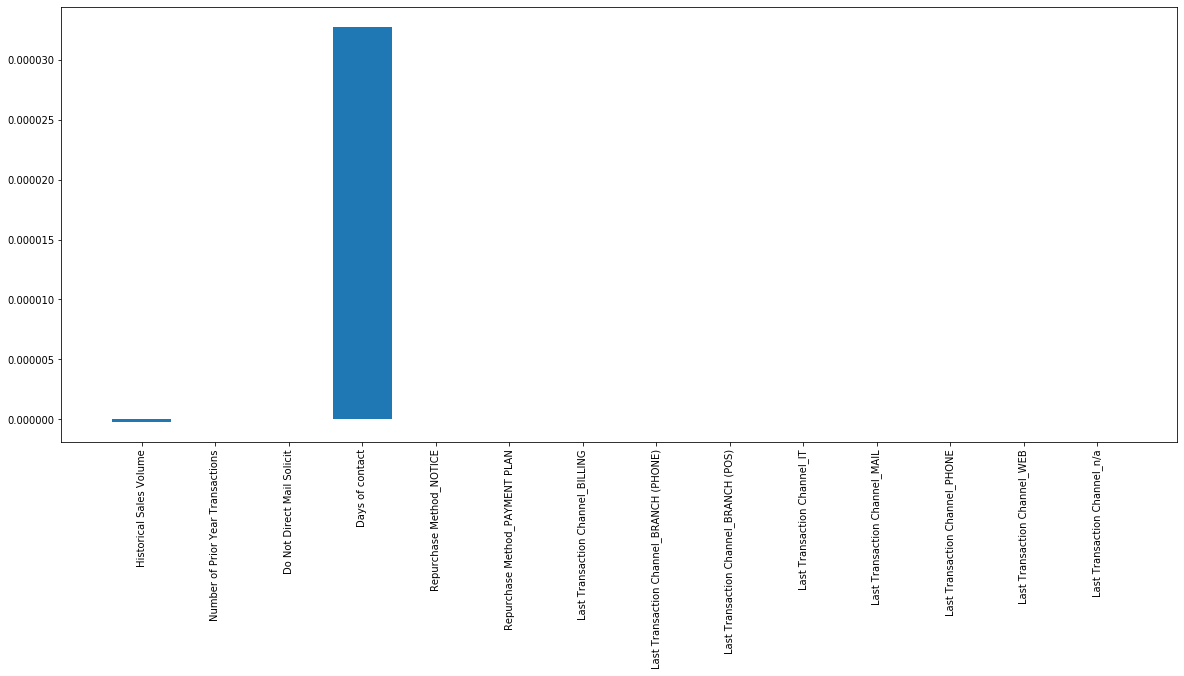

In [193]:
coefs = clf.coef_[0]
features = X2.columns
plt.figure(figsize=(20,8))
plt.bar(features,coefs)
plt.xticks(rotation = 90)

In [167]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           N       0.76      0.18      0.29      2919
           Y       0.29      0.86      0.43      1122

    accuracy                           0.37      4041
   macro avg       0.52      0.52      0.36      4041
weighted avg       0.63      0.37      0.33      4041



In [191]:
print(classification_report(y2_test,clf.predict(X2_test)))

              precision    recall  f1-score   support

           N       0.59      0.17      0.27      2989
           Y       0.51      0.88      0.64      2903

    accuracy                           0.52      5892
   macro avg       0.55      0.53      0.46      5892
weighted avg       0.55      0.52      0.45      5892



In [442]:
#probs = clf.predict_proba(X_test)
probs

array([[0.7195284 , 0.2804716 ],
       [0.67552302, 0.32447698],
       [0.59321425, 0.40678575],
       ...,
       [0.71018952, 0.28981048],
       [0.63819252, 0.36180748],
       [0.6605256 , 0.3394744 ]])

In [192]:
probs2 = clf.predict_proba(X2_test)
probs2

array([[0.39155574, 0.60844426],
       [0.4707523 , 0.5292477 ],
       [0.46207587, 0.53792413],
       ...,
       [0.49768023, 0.50231977],
       [0.43318837, 0.56681163],
       [0.44289262, 0.55710738]])

In [178]:
altered_predictions = np.where(probs2[:,1] >= .3,"Y","N")

In [183]:
print(classification_report(y2_test,altered_predictions))

              precision    recall  f1-score   support

           N       0.57      0.01      0.02      3009
           Y       0.49      0.99      0.66      2883

    accuracy                           0.49      5892
   macro avg       0.53      0.50      0.34      5892
weighted avg       0.53      0.49      0.33      5892



In [180]:
dtree.feature_importances_

array([2.13222194e-01, 9.68473769e-02, 1.28795596e-02, 6.20479752e-01,
       1.32613147e-02, 0.00000000e+00, 5.08077894e-04, 5.22386150e-03,
       3.29876604e-03, 0.00000000e+00, 1.43636395e-02, 5.88212391e-03,
       9.92860376e-03, 4.10473021e-03])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

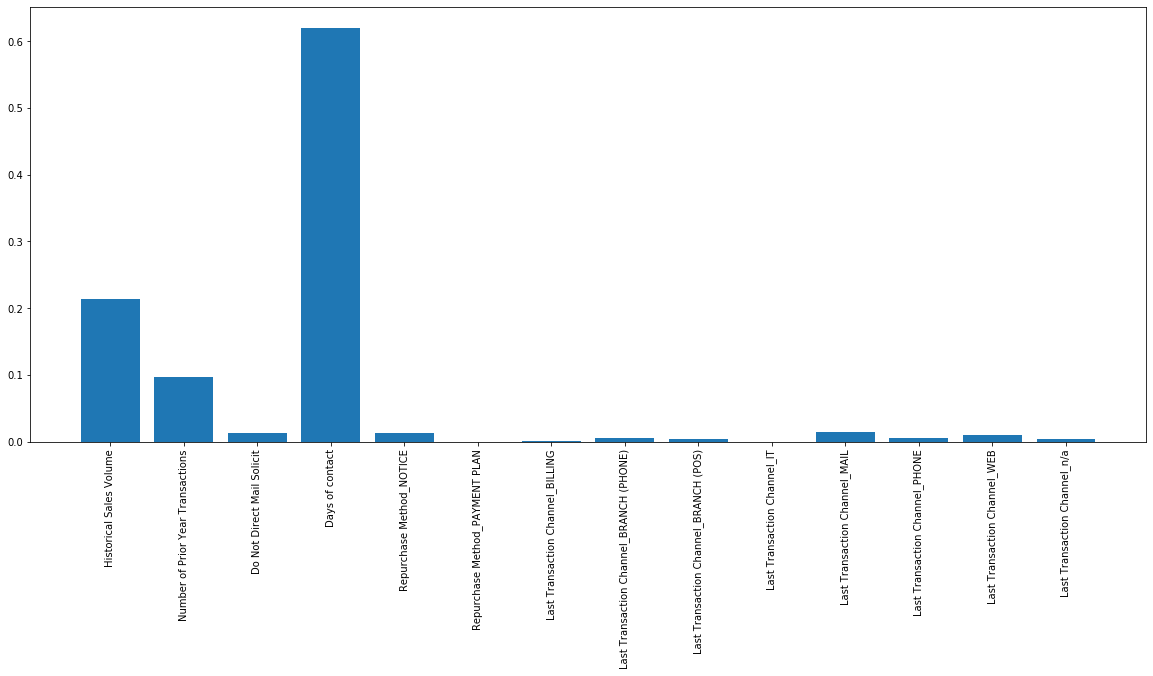

In [181]:
plt.figure(figsize = (20,8))
plt.bar(features,dtree.feature_importances_)
plt.xticks(rotation = 90) #days of contact is an important feature split, Historical sales volume an important feature

In [463]:
#X = data[["Historical Sales Volume","Number of Prior Year Transactions","Days of contact"]]# cant use features like desk,chair,printer etc b/c they are dependent to campaign period sales
#Y = data["Campaign Period Sales"]# Historical Sales Volume, Number of Prior Year TRANSaction, Days of contact give insight we dont have

In [194]:
X2 = data_up_sampled[["Historical Sales Volume","Number of Prior Year Transactions","Days of contact"]]
y2 = data_up_sampled["Campaign Period Sales"]

In [464]:
#X_train,X_test,y_train,y_test = train_test_split(X,Y)

In [195]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [197]:
lr = LinearRegression()
tree = DecisionTreeRegressor()

In [467]:
#lr.fit(X_train,y_train)
#tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

<BarContainer object of 3 artists>

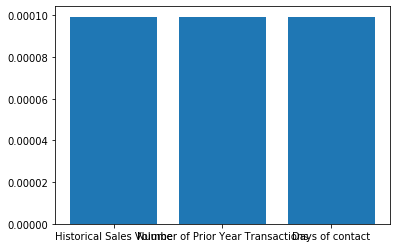

In [468]:
#plt.bar(X.columns,lr.coef_[0])

In [469]:
#lr.score(X_test,y_test)

0.051112051169331485

In [470]:
#tree.score(X_test,y_test)

-0.4020927419314342

In [198]:
lr.fit(X2_train,y2_train)
tree.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [199]:
lr.score(X2_test,y2_test)

0.04237093080342291

In [200]:
tree.score(X2_test,y2_test)

0.6459764705160278

<BarContainer object of 3 artists>

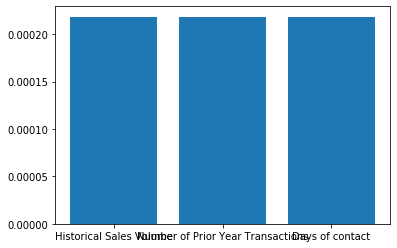

In [201]:
plt.bar(X2.columns,lr.coef_[0])

In [200]:
data["made purchase"] = data["Campaign Period Sales"].apply(buy_or_not_buy) # try going back and going through the items column and checking to see if they bought or not
data["made purchase"]

0        Y
1        Y
2        Y
3        N
4        Y
        ..
16167    N
16168    N
16169    N
16170    N
16171    N
Name: made purchase, Length: 16162, dtype: object

In [158]:
X = data[["Campaign Period Sales","Historical Sales Volume","Number of Prior Year Transactions","made purchase"]]
#double bracket want to return a dataframe as oppose to a series
# when chosing mutiple columns have to pass it in as a container

In [159]:
X.head()

,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,made purchase
0,238.704762,146803.428571,15.0,Y
1,281.680000,439984.160000,22.0,Y
2,432.857143,970465.714286,19.0,Y
3,0.000000,230193.600000,17.0,N
4,1370.166667,27403.333333,21.0,Y
